In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [4]:
data_dir = '/run/media/anup/3becd611-cb79-4b80-b941-2edcc0d64cb4/data/allen_neuropixeldata'
manifest_path = os.path.join(data_dir, "manifest.json")
print(manifest_path)

/run/media/anup/3becd611-cb79-4b80-b941-2edcc0d64cb4/data/allen_neuropixeldata/manifest.json


In [5]:
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

PermissionError: [Errno 13] Permission denied: '/run/media'

In [7]:
sessions = cache.get_session_table()
print(sessions.columns)
print(sessions.head())

Index(['published_at', 'specimen_id', 'session_type', 'age_in_days', 'sex',
       'full_genotype', 'unit_count', 'channel_count', 'probe_count',
       'ecephys_structure_acronyms'],
      dtype='object')
                   published_at  specimen_id           session_type  \
id                                                                    
715093703  2019-10-03T00:00:00Z    699733581  brain_observatory_1.1   
719161530  2019-10-03T00:00:00Z    703279284  brain_observatory_1.1   
721123822  2019-10-03T00:00:00Z    707296982  brain_observatory_1.1   
732592105  2019-10-03T00:00:00Z    717038288  brain_observatory_1.1   
737581020  2019-10-03T00:00:00Z    718643567  brain_observatory_1.1   

           age_in_days sex                                    full_genotype  \
id                                                                            
715093703        118.0   M    Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   
719161530        122.0   M    Sst-IRES-Cre/wt;Ai32(RCL-ChR2

In [8]:
filtered_sessions = sessions[(sessions.sex == 'M') & \
                             (sessions.full_genotype.str.find('wt/wt') > -1) & \
                             (sessions.session_type == 'brain_observatory_1.1') & \
                             (['CA3' in acronyms for acronyms in 
                               sessions.ecephys_structure_acronyms])]
print(filtered_sessions)

                   published_at  specimen_id           session_type  \
id                                                                    
743475441  2019-10-03T00:00:00Z    722882755  brain_observatory_1.1   
744228101  2019-10-03T00:00:00Z    719817805  brain_observatory_1.1   
750332458  2019-10-03T00:00:00Z    726141251  brain_observatory_1.1   
750749662  2019-10-03T00:00:00Z    726162197  brain_observatory_1.1   
754312389  2019-10-03T00:00:00Z    719828690  brain_observatory_1.1   
754829445  2019-10-03T00:00:00Z    726298253  brain_observatory_1.1   
757216464  2019-10-03T00:00:00Z    733457989  brain_observatory_1.1   
757970808  2019-10-03T00:00:00Z    730756780  brain_observatory_1.1   
759883607  2019-10-03T00:00:00Z    740268986  brain_observatory_1.1   
761418226  2019-10-03T00:00:00Z    742714475  brain_observatory_1.1   
763673393  2019-10-03T00:00:00Z    742602892  brain_observatory_1.1   
799864342  2019-10-03T00:00:00Z    772616823  brain_observatory_1.1   

     

In [9]:
print(filtered_sessions)

                   published_at  specimen_id           session_type  \
id                                                                    
743475441  2019-10-03T00:00:00Z    722882755  brain_observatory_1.1   
744228101  2019-10-03T00:00:00Z    719817805  brain_observatory_1.1   
750332458  2019-10-03T00:00:00Z    726141251  brain_observatory_1.1   
750749662  2019-10-03T00:00:00Z    726162197  brain_observatory_1.1   
754312389  2019-10-03T00:00:00Z    719828690  brain_observatory_1.1   
754829445  2019-10-03T00:00:00Z    726298253  brain_observatory_1.1   
757216464  2019-10-03T00:00:00Z    733457989  brain_observatory_1.1   
757970808  2019-10-03T00:00:00Z    730756780  brain_observatory_1.1   
759883607  2019-10-03T00:00:00Z    740268986  brain_observatory_1.1   
761418226  2019-10-03T00:00:00Z    742714475  brain_observatory_1.1   
763673393  2019-10-03T00:00:00Z    742602892  brain_observatory_1.1   
799864342  2019-10-03T00:00:00Z    772616823  brain_observatory_1.1   

     

In [10]:
probes = cache.get_probes()
print(probes.head())

           ecephys_session_id  lfp_sampling_rate    name phase  sampling_rate  \
id                                                                              
729445648           719161530        1249.998642  probeA    3a   29999.967418   
729445650           719161530        1249.996620  probeB    3a   29999.918880   
729445652           719161530        1249.999897  probeC    3a   29999.997521   
729445654           719161530        1249.996707  probeD    3a   29999.920963   
729445656           719161530        1249.999979  probeE    3a   29999.999500   

           has_lfp_data  unit_count  channel_count  \
id                                                   
729445648          True          87            374   
729445650          True         202            368   
729445652          True         207            373   
729445654          True          93            358   
729445656          True         138            370   

                                 ecephys_structure_ac

In [11]:
channels = cache.get_channels()
print(channels.columns)
print(channels.head())

Index(['ecephys_probe_id', 'local_index', 'probe_horizontal_position',
       'probe_vertical_position', 'anterior_posterior_ccf_coordinate',
       'dorsal_ventral_ccf_coordinate', 'left_right_ccf_coordinate',
       'ecephys_structure_id', 'ecephys_structure_acronym',
       'ecephys_session_id', 'lfp_sampling_rate', 'phase', 'sampling_rate',
       'has_lfp_data', 'unit_count'],
      dtype='object')
           ecephys_probe_id  local_index  probe_horizontal_position  \
id                                                                    
849705558         792645504            1                         11   
849705560         792645504            2                         59   
849705562         792645504            3                         27   
849705564         792645504            4                         43   
849705566         792645504            5                         11   

           probe_vertical_position  anterior_posterior_ccf_coordinate  \
id                    

In [14]:
units = cache.get_units()
print(units.columns)
print(units.head())
print(len(units))

Index(['waveform_PT_ratio', 'waveform_amplitude', 'amplitude_cutoff',
       'cumulative_drift', 'd_prime', 'waveform_duration',
       'ecephys_channel_id', 'firing_rate', 'waveform_halfwidth',
       'isi_violations', 'isolation_distance', 'L_ratio', 'max_drift',
       'nn_hit_rate', 'nn_miss_rate', 'presence_ratio',
       'waveform_recovery_slope', 'waveform_repolarization_slope',
       'silhouette_score', 'snr', 'waveform_spread', 'waveform_velocity_above',
       'waveform_velocity_below', 'ecephys_probe_id', 'local_index',
       'probe_horizontal_position', 'probe_vertical_position',
       'anterior_posterior_ccf_coordinate', 'dorsal_ventral_ccf_coordinate',
       'left_right_ccf_coordinate', 'ecephys_structure_id',
       'ecephys_structure_acronym', 'ecephys_session_id', 'lfp_sampling_rate',
       'name', 'phase', 'sampling_rate', 'has_lfp_data', 'date_of_acquisition',
       'published_at', 'specimen_id', 'session_type', 'age_in_days', 'sex',
       'genotype'],
      d

In [16]:
print(filtered_sessions.index.values[0])
session = cache.get_session_data(filtered_sessions.index.values[0])
# print([attr_or_method for attr_or_method in dir(session) if attr_or_method[0] != '_']

743475441


In [17]:
session.probes

,description,location,sampling_rate,lfp_sampling_rate,has_lfp_data
id,,,,,
769325777,probeA,See electrode locations,29999.967105,1249.998629,True
769325781,probeB,See electrode locations,29999.915484,1249.996479,True
769325786,probeC,See electrode locations,29999.996490,1249.999854,True
769326325,probeD,See electrode locations,29999.920560,1249.996690,True
769326329,probeE,See electrode locations,29999.995939,1249.999831,True
769326332,probeF,See electrode locations,30000.037949,1250.001581,True


-459.0 4387.0


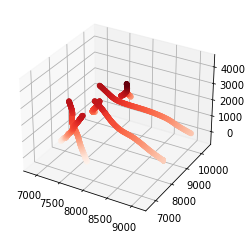

In [18]:
session.channels.keys()
ycoords = session.channels.left_right_ccf_coordinate
zcoords = session.channels.dorsal_ventral_ccf_coordinate
xcoords = session.channels.anterior_posterior_ccf_coordinate
fh = plt.figure()
# ah = fh.add_subplot(111)
ah = plt.axes(projection='3d')
ah.view_init()
ah.scatter3D(xcoords,ycoords,zcoords,c=zcoords,cmap='Reds')
# print(xcoords)
# print(ycoords)
print(zcoords.min(),zcoords.max())

In [19]:
{session.probes.loc[probe_id].description : 
     list(session.channels[session.channels.probe_id == probe_id].ecephys_structure_acronym.unique())
     for probe_id in session.probes.index.values}


{'probeA': ['VISam', nan, 'APN', 'DG', 'CA1'],
 'probeB': [nan, 'PO', 'Eth', 'LP', 'DG', 'CA1', 'VISmma'],
 'probeC': ['VISp', nan, 'LP', 'DG', 'ProS', 'SUB'],
 'probeD': ['VISl', nan, 'LGd', 'CA3', 'DG', 'CA1'],
 'probeE': ['VISrl', nan, 'PP', 'PIL', 'MGv', 'TH', 'HPF', 'CA3', 'DG', 'CA1'],
 'probeF': [nan, 'LP', 'LGd', 'HPF', 'DG', 'CA3', 'CA1', 'VISrl']}

In [20]:
probe_id = session.probes[session.probes.description == 'probeD'].index.values[0]
print(session.probes)
print(probe_id)
lfp = session.get_lfp(probe_id)

          description                 location  sampling_rate  \
id                                                              
769325777      probeA  See electrode locations   29999.967105   
769325781      probeB  See electrode locations   29999.915484   
769325786      probeC  See electrode locations   29999.996490   
769326325      probeD  See electrode locations   29999.920560   
769326329      probeE  See electrode locations   29999.995939   
769326332      probeF  See electrode locations   30000.037949   

           lfp_sampling_rate  has_lfp_data  
id                                          
769325777        1249.998629          True  
769325781        1249.996479          True  
769325786        1249.999854          True  
769326325        1249.996690          True  
769326329        1249.999831          True  
769326332        1250.001581          True  
769326325


In [24]:
lfp.coords
lfp_slice = lfp.sel(time=slice(100,101))
lfp_slice

<xarray.DataArray 'LFP' (time: 1250, channel: 83)>
array([[-1.0120500e-04, -1.0315500e-04, -7.0199996e-05, ...,
        -7.9949996e-06,  6.4350002e-06,  1.9110001e-05],
       [-7.5855001e-05, -5.0114999e-05, -5.9670001e-05, ...,
         4.4849999e-06,  1.0920000e-05,  0.0000000e+00],
       [-6.5909997e-05, -6.5325003e-05, -7.1565002e-05, ...,
         2.7300000e-06,  6.2399999e-06,  5.6549998e-06],
       ...,
       [ 4.8749998e-06, -6.2399999e-06,  2.9055000e-05, ...,
        -1.2675000e-05,  5.8500001e-07,  2.3400000e-06],
       [ 1.9890000e-05, -1.3650000e-06,  2.5935000e-05, ...,
         1.9500000e-07, -7.0199999e-06, -3.1590000e-05],
       [ 4.7580001e-05,  5.6159999e-05,  5.1870000e-05, ...,
        -2.7300000e-06,  7.8000003e-06,  1.0335000e-05]], dtype=float32)
Coordinates:
  * time     (time) float64 100.0 100.0 100.0 100.0 ... 101.0 101.0 101.0 101.0
  * channel  (channel) int64 849751874 849751882 ... 849752522 849752530

Text(0, 0.5, 'LFP (V)')

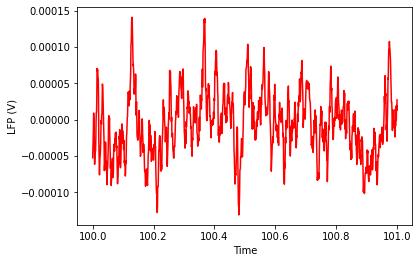

In [25]:
fh = plt.figure()
ah = fh.add_subplot(111)
ah.plot(lfp_slice.time,lfp_slice.sel(channel=lfp_slice.channel[10]),color='red')
ah.set_xlabel("Time")
ah.set_ylabel("LFP (V)")

In [64]:
# units_of_interest = session.units[(session.units.probe_id == probe_id) &
#                                   (session.units.ecephys_structure_acronym.str.find('CA3') > -1) &
#                                   (session.units.firing_rate > 10) & 
#                                   (session.units.nn_hit_rate > 0.95)]
# units_of_interest
units = session.units[session.units.ecephys_structure_acronym.isin(['CA3']) &
                   session.units.firing_rate>0]
# print(units)
print(units.shape)
unit_id = units.index.values[0]
channel_index = unit.loc[unit_id].channel_local_index
print(unit_id)
print(channel_index)
channel_id = session.channels[(session.channels.local_index == channel_index) & 
                              (session.channels.probe_id == probe_id)].index.values[0]
print(channel_id)

(5, 89)
951005145
81
849752032


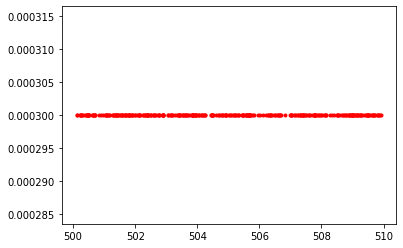

In [72]:
start_time = 500
end_time = 510
spike_times = session.spike_times[unit_id]
times_in_range = spike_times[(spike_times > start_time) & (spike_times < end_time)]
fh = plt.figure()
ah = fh.add_subplot(111)
ah.plot(times_in_range,np.ones(times_in_range.shape)*3e-4, '.r')